In [43]:
#Importação das bibliotecas necessárias

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math

from pandas.core.dtypes.api import is_numeric_dtype

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import silhouette_score, accuracy_score, silhouette_samples

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectPercentile, f_classif, mutual_info_classif


In [44]:
#Carga dos dados
data1 = pd.read_csv('CAR-recursos-naturais-municipios.csv')
data2 = pd.read_csv('IBGE-municipios.csv')


In [50]:
#Merge dos datasets importados
data = pd.merge(data1, data2, how='inner', on="Nome do Município")
data.head()


In [51]:
#Remoção dos dados categóricos
df = data.select_dtypes(include=np.number)

In [52]:
#Visualização dos valores extremos\n",

print(df.max())
print(df.min())

APP          15142
Manguezal        1
dtype: int64
APP          262
Manguezal      0
dtype: int64


In [53]:
#Como a amplitude dos valores é alta, é necessário normalizar os dados

#df_norm = minmax_scale(df)
normZ = StandardScaler()
df_norm =normZ.fit_transform(df)

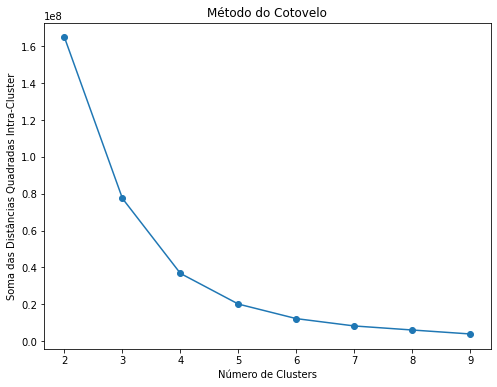

[[3, 16625268.48018647], [4, 7888946.321428571], [5, 3970568.061904762], [6, 2194940.333333333], [7, 2151031.297591299]]
[3, 16625268.48018647]


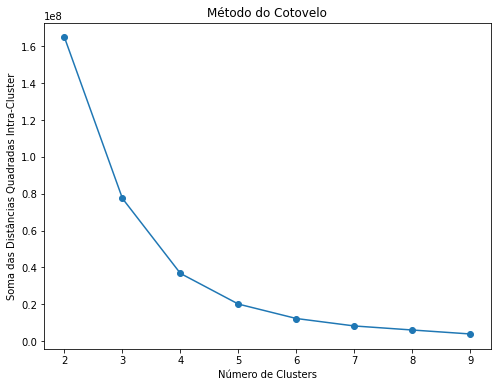

[[3, 16625268.48018647], [4, 7823308.615134861], [5, 4036205.7681984715], [6, 2194940.333333333], [7, 2151031.297591299]]
[3, 16625268.48018647]


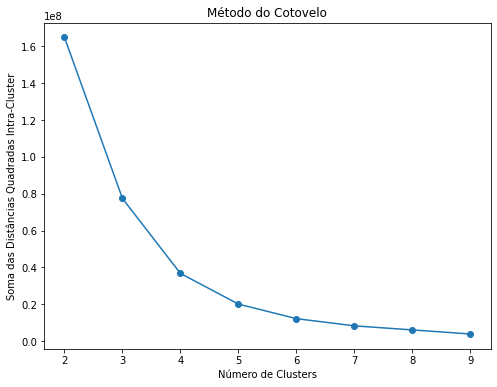

[[3, 16625268.48018647], [4, 7888946.321428571], [5, 3904930.355611058], [6, 2216669.0038850037], [7, 2194940.333333332]]
[3, 16625268.48018647]


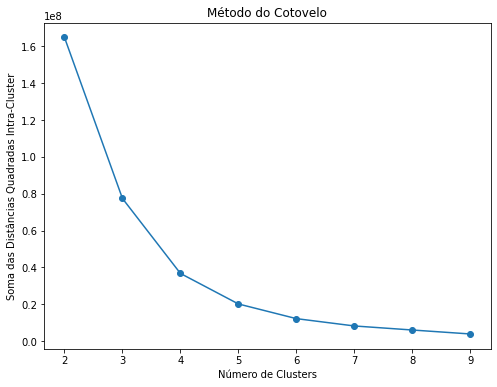

[[3, 16559630.773892764], [4, 7954584.027722277], [5, 3970568.061904762], [6, 2194940.333333333], [7, 2151031.297591299]]
[3, 16559630.773892764]


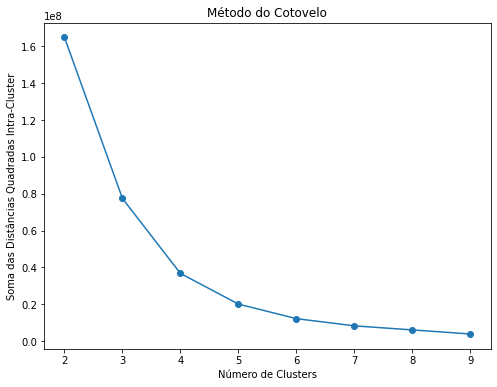

[[3, 16625268.48018647], [4, 7888946.321428571], [5, 3904930.355611058], [6, 2216669.0038850037], [7, 2194940.333333332]]
[3, 16625268.48018647]


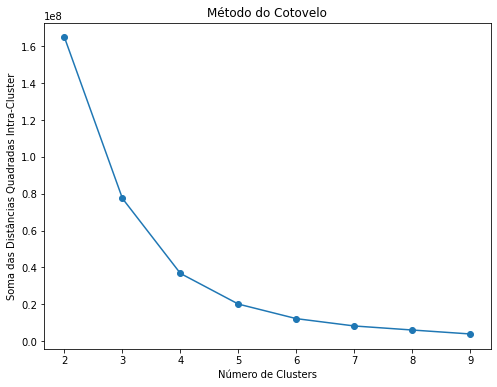

[[3, 16625268.48018647], [4, 7888946.321428571], [5, 3970568.061904762], [6, 2194940.333333333], [7, 2143679.8642579643]]
[3, 16625268.48018647]


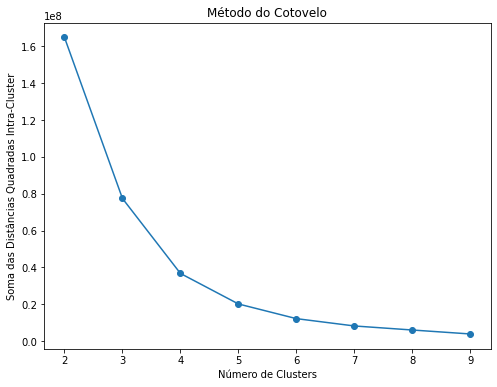

[[3, 16559630.773892764], [4, 7954584.027722277], [5, 3970568.061904762], [6, 2194940.333333333], [7, 2151031.297591299]]
[3, 16559630.773892764]


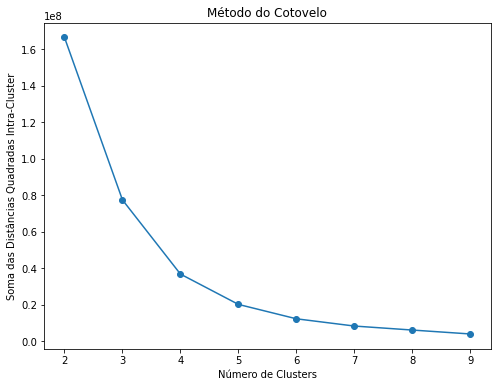

[[3, 16625268.48018647], [4, 7888946.321428571], [5, 3970568.061904762], [6, 2194940.333333333], [7, 2151031.297591299]]
[3, 16625268.48018647]


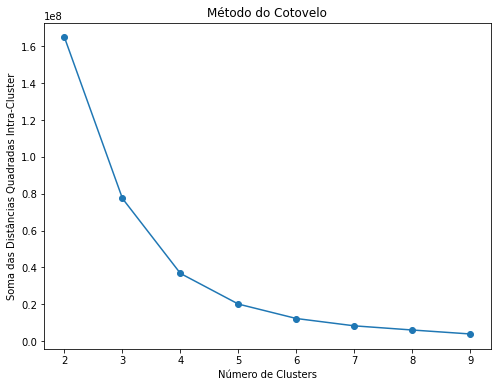

[[3, 16625268.48018647], [4, 7823308.615134861], [5, 3970568.0619047675], [6, 2260578.039627037], [7, 2151031.297591299]]
[3, 16625268.48018647]


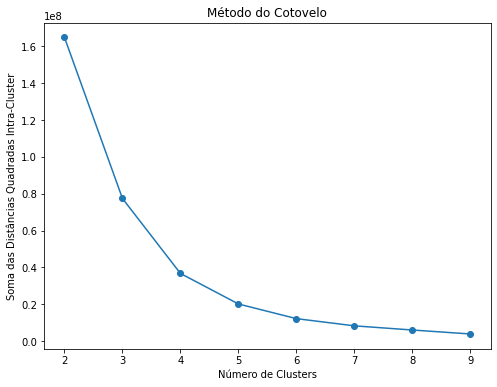

[[3, 16559630.773892764], [4, 7954584.027722277], [5, 3904930.355611058], [6, 2260578.039627037], [7, 2151031.297591299]]
[3, 16559630.773892764]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
3


In [54]:
#Executa o "Método Elbow" várias vezes a fim de se obter o valor de K que mais se repete

#Necessário definir sempre um mesmo valor de K
import statistics as st
import math

def distancia(diferencas):
    dist = []
    #Cálculo da reta
    x0 = diferencas[0][0]
    y0 = diferencas[0][1]
        
    x1 = diferencas[len(diferencas)-1][0]
    y1 = diferencas[len(diferencas)-1][1]
    
    for i in diferencas:
        aux = []
        x = i[0]
        y = i[1]
             
        numerador = abs((y1-y0)*x - (x1-x0)*y - y1*x0)
        denominador = math.sqrt((y1-y0)**2 + (x1-x0)**2)
        d = numerador/denominador
        aux.append(x)
        aux.append(y)
        dist.append(aux)
    print(dist)
    maior = sorted(dist, key=lambda d: d[1], reverse=True)
    print(maior[0])

def define_K():
    quantidade = 10
    valores = []
    
    for vez in range(quantidade):
        inicio = 2
        fim = 10
        inercia = []

        for i in range(inicio, fim):
            kmeans = KMeans(n_clusters = i)
            kmeans.fit(df)
            inercia.append(kmeans.inertia_)
            
        
        plt.figure(figsize=(8, 6))
        plt.plot(range(inicio, fim), inercia, marker='o')
        plt.title('Método do Cotovelo')
        plt.xlabel('Número de Clusters')
        plt.ylabel('Soma das Distâncias Quadradas Intra-Cluster')
        plt.show()
        

        #Cálculo da maior queda do "joelho"
        diferencas = []
        for j in range(2,len(inercia)):
            if j+1 != len(inercia):
                t = []
                m = inercia[j] - inercia[j+1]
                t.append(j+1)
                t.append(m)
                diferencas.append(t)
        
        distancia(diferencas)
  
        valorK = sorted(diferencas, key=lambda diferenca: diferenca[1], reverse=True)
        valores.append((valorK[0][0]))
    return valores

val = define_K()
print(val)
print(st.mode(val))

In [12]:
#Algoritmo KMeans sem uso do PCA

df = df.select_dtypes(include=np.number)
min_max = MinMaxScaler()
df_norm_2 = min_max.fit_transform(df)

K = st.mode(define_K())
kmeans = KMeans(n_clusters = K, init='k-means++', tol=0.0001, verbose=0, random_state = 0, max_iter = 100, copy_x=True, n_init=10, algorithm='elkan')
cluster = kmeans.fit_predict(df_norm_2)
centroide_dado_bruto = kmeans.cluster_centers_

valor_referencia_centroide = min_max.inverse_transform(centroide_dado_bruto)

[[3, 46618181.873051815], [4, 20355145.30021368], [5, 11862404.04796036], [6, 4900552.233333327], [7, 2904183.5]]


In [25]:
#Silhouette Score
from sklearn.metrics import silhouette_samples, silhouette_score

'''
score = silhouette_score(df, kmeans.labels_, metric='euclidean')
print(score)
'''
range_n_clusters = [2, 3, 4, 5, 6]
for cluster in range_n_clusters:
    kmeans = KMeans(n_clusters = cluster, init='k-means++', tol=0.0001, verbose=0, random_state = 0, max_iter = 100, copy_x=True, n_init=10, algorithm='elkan')
    c = kmeans.fit_predict(df)
    centers = kmeans.cluster_centers_
    score = silhouette_score(df, kmeans.labels_, metric='euclidean')
    print(score)

0.8719020948703863
0.5773014583829668
0.46709405260968345
0.5301714036406556
0.49878626301915957


In [9]:
#PCA = Reduzindo a dimensionalidade dos dados

pca = PCA(n_components = 2)
pcaTransformacao = pca.fit_transform(df_norm)

centroids = pca.fit_transform(centroide_dado_bruto)

In [10]:
#Algoritmo K-Means: execução somente para obter os centroids após a transformação do PCA

#Calculando os agrupamentos dos dados na dimensão K
K = st.mode(define_K())

#IMPORTANTE: Explicar a escolha de cada valor aqui do parâmetro
kmeans = KMeans(n_clusters = K, init='k-means++', tol=0.0001, verbose=0, random_state = 0, max_iter = 100, copy_x=True, n_init=10, algorithm='elkan')

cluster = kmeans.fit_predict(pcaTransformacao)

#Centroides de cada um dos clusters gerados
centroids = kmeans.cluster_centers_

[[3, 46514414.98611112], [4, 20850366.50274726], [5, 11561645.292715602], [6, 5201310.988578085], [7, 3350173.7642857134]]


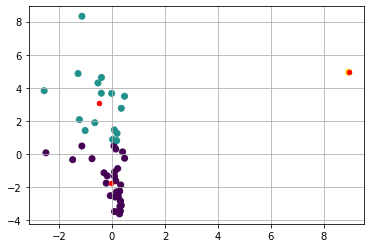

In [11]:
#Plotagem bidimensional dos agrupamentos formados

plt.scatter(pcaTransformacao[:,1], pcaTransformacao[:,0], c=cluster)
plt.grid()
plt.scatter(centroids[:,1], centroids[:,0], s=20, c='red')
plt.show()

In [12]:
#Criando dataframe com os valores dos centroides para visualização dos valores 

atributos = df.columns
#Dataframe sem normalização
d = pd.DataFrame(np.round(valor_referencia_centroide, 2), columns=atributos)
display(d)

,APP,Altitude Superior 1800,Consolidada,Declividade Maior 45,Imoveis,Pousio,Topo de Morro,Banhado,Borda Chapada,Hidrografia,...,IDHM(2010),Total receitas realizadas(2017),Total receitas empenhadas(2017),Mortalidade infantil(2019),Internacoes por diarreia(2016),Estabelecimentos SUS(2009),Area territorial(2021),Esgotamento adequado(2010),Arborização vias publicas(2010),Urbanizacao vias publicas(2010)
0,8180.67,0.00,1494.25,6.08,1619.00,45.92,6.33,10.67,0.08,1384.67,...,0.70,131925.30,121586.80,9.37,1.07,24.92,811.61,64.94,55.97,29.68
1,2524.73,0.03,473.12,2.24,578.58,19.94,1.73,3.55,0.30,481.97,...,0.68,57804.72,50533.48,12.27,0.55,6.61,323.30,52.80,66.40,19.12
2,1957.33,0.00,453.33,3.00,656.00,13.33,2.00,1.67,0.00,384.00,...,0.76,1380818.10,1199108.92,12.43,0.17,105.00,358.52,90.70,71.40,27.03


<AxesSubplot:>

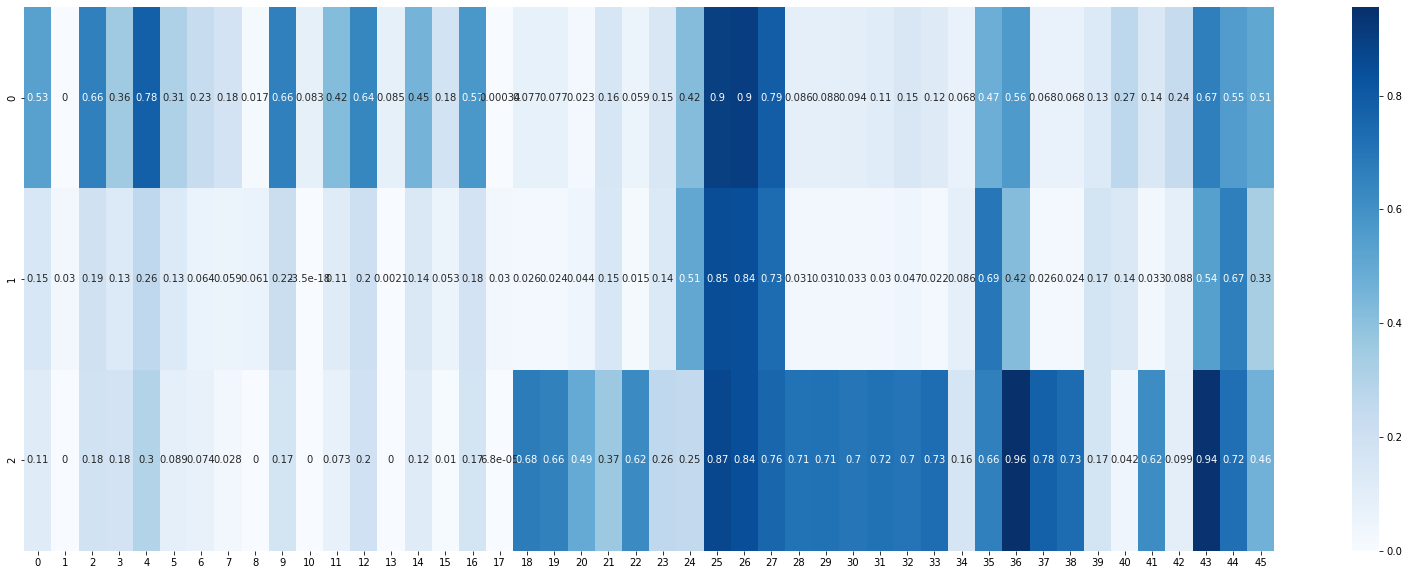

In [13]:
#Heatmap do dataframe dos centroides

fig, ax = plt.subplots(figsize=(28,10))  
#Dataframe com normalização
sns.heatmap(centroide_dado_bruto, annot=True, cmap="Blues")

In [14]:
#Visualização das cidades em cada um dos agrupamentos formados

def cidades_agrupamento(cluster):
    c0 = []
    c1 = []
    c2 = []
    c3 = []
    c4 = []
    c5 = []
    c6 = []

    #Valores PCA por cluster
    c0_pca = []
    c1_pca = []
    c2_pca = []
    c3_pca = []
    c4_pca = []
    c5_pca = []
    c6_pca = []

    indice = 0
    cidades = []

    for i in cluster:
        if i == 0:
            c0.append(data['Nome do Município'][indice])
        elif i == 1:
            c1.append(data['Nome do Município'][indice])
        elif i == 2:
            c2.append(data['Nome do Município'][indice])
        elif i == 3:
            c3.append(data['Nome do Município'][indice])
        elif i == 4:
            c4.append(data['Nome do Município'][indice])
        elif i == 5:
            c5.append(data['Nome do Município'][indice])
        else:
            c6.append(data['Nome do Município'][indice])
        indice+=1

    if len(c0) != 0:
        cidades.append(c0)
    if len(c1) != 0:
        cidades.append(c1)
    if len(c2) != 0:
        cidades.append(c2)
    if len(c3) != 0:
        cidades.append(c3)
    if len(c4) != 0:
        cidades.append(c4)
    if len(c5) != 0:
        cidades.append(c5)
    if len(c6) != 0:
        cidades.append(c6)

    return cidades

In [15]:
kmeans_dados_bruto = cidades_agrupamento(cluster)
print(kmeans_dados_bruto)

[['Bonfim', 'Brumadinho', 'Conselheiro Lafaiete', 'Curvelo', 'Desterro de Entre Rios', 'Entre Rios de Minas', 'Esmeraldas', 'Itaúna', 'Jeceaba', 'Lagoa Dourada', 'Ouro Preto', 'Pará de Minas', 'Resende Costa'], ['Belo Vale', 'Cachoeira da Prata', 'Caetanópolis', 'Casa Grande', 'Congonhas', 'Cristiano Otoni', 'Crucilândia', 'Felixlândia', 'Florestal', 'Fortuna de Minas', 'Ibirité', 'Igarapé', 'Inhaúma', 'Itatiaiuçu', 'Itaverava', 'Juatuba', 'Maravilhas', 'Mario Campos', 'Mateus Lemes', 'Moeda', 'Ouro Branco', 'Papagaios', 'Paraopeba', 'Pequi', 'Piedade dos Gerais', 'Pompéu', 'Queluzito', 'Rio Manso', 'São Brás do Suaçuí', 'São Joaquim de Bicas', 'São José da Varginha', 'Sarzedo'], ['Betim', 'Contagem', 'Sete Lagoas']]


In [16]:
#Caracterização dos agrupamentos

campos = [['Quantidade total de cidades', 'População total', 'Porcentagem da população geral']]
dados = []
aux = []

for agrupamento in kmeans_dados_bruto:
    aux.append(len(agrupamento))

dados.append(aux)
aux = []

for agrupamento in kmeans_dados_bruto:
    for cidade in agrupamento:
        total = data[data['Nome do Município'] == cidade]['População estimada(2021)'].values[0]
        total += total
    aux.append(total)

dados.append(aux)

pop_geral = sum(aux)
aux2 = []

for total in aux:
    aux2.append((total/pop_geral)*100)

dados.append(aux2)

dados_transposta = list(map(list, zip(*dados)))

d = pd.DataFrame(dados_transposta, columns=campos)
d.head()


,Quantidade total de cidades,População total,Porcentagem da população geral
0,13,23156,3.998232
1,32,68100,11.758490
2,3,487900,84.243278


In [23]:
#Métricas para avaliação dos agrupamentos formados
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
#Davies-Boulding Index
labels = kmeans.labels_
m1 = davies_bouldin_score(df, labels)
print(m1)

#Variance Ratio Criterion
labels = kmeans.labels_
m2 = calinski_harabasz_score(df, labels)
print(m2)

#Índice Dunn


#Distância Média entre Centróides



1.5888968713368141
89.86496875809546
